##     2.a) 
En Chile, la Norma Técnica de Seguridad y Calidad de Servicio (NTC) establece los límites admisibles de operación para garantizar un servicio eléctrico seguro, confiable y de calidad. A continuación, se detallan los principales límites admisibles de operación según esta normativa:

### 1. Frecuencia

    •Frecuencia nominal: 50 Hz.

    •Desviaciones Permitidas:
        o	En condiciones normales: ±0.2 Hz.
        o   En condiciones de emergencia: ±0.5 Hz.

### 2. Tensión

    •	Tensión Nominal: Dependiendo del nivel de tensión:
        o	Baja Tensión: 220/380 V.
        o	Media y Alta Tensión: Según las especificaciones del sistema.

    •	Variaciones Permitidas:
        o	Baja Tensión: ±10% respecto a la tensión nominal.
        o	Media y Alta Tensión: ±5% respecto a la tensión nominal.

### 3. Cargabilidad de Líneas y Transformadores

    •	Cargabilidad Normal: No debe exceder el 100% de la capacidad nominal del equipo.

    •	Cargabilidad de Emergencia: Puede permitir hasta un 120% de la capacidad nominal por un tiempo limitado, dependiendo de las especificaciones del fabricante y condiciones operativas.

### 4. Factor de Potencia

    •	Límite Inferior: 0.92 inductivo.

    •	Límite Superior: 1.0.

### 5. Interrupciones y Calidad de Servicio

    •	Frecuencia de Interrupciones: Máximo de 6 interrupciones por año por consumidor.

    •	Duración Máxima de Interrupciones: No más de 4 horas por interrupción.

### 6. Distorsión Armónica Total (THD)

    •	Límite para Voltaje: Menor del 5% para niveles de baja tensión.

    •	Límite para Corriente: Según la categoría de la instalación, generalmente menor al 8% para niveles de baja tensión.

### 7. Parpadeo de Voltaje

    •	Límite Admisible:

        o	Pst (Perceived Short-term Flicker Severity): Menor a 1.0.

        o	Plt (Perceived Long-term Flicker Severity): Menor a 0.8.

### 8. Desequilibrio de Tensión

    •	Límite Admisible: El desequilibrio de tensión en sistemas trifásicos no debe exceder el 3%.

### 9. Tiempo de Respuesta ante Contingencias

    •	Recuperación del Servicio: El 90% de los clientes afectados debe tener restablecido el servicio dentro de las 4 horas posteriores a una interrupción.


Estos límites son establecidos para mantener un estándar de calidad y seguridad en el suministro eléctrico, minimizando las interrupciones y asegurando un servicio continuo y de calidad para los usuarios. Es crucial para las empresas eléctricas y operadores del sistema cumplir con estos límites para garantizar la confiabilidad del sistema eléctrico en Chile.

## 2.b) 


### Modelamiento con Parámetros Concentrados

    El modelamiento con parámetros concentrados de una línea de transmisión asume que todos los parámetros eléctricos (resistencia, inductancia, capacitancia y conductancia) se concentran en un punto o en varias secciones discretas a lo largo de la línea. Este modelo es adecuado para líneas de transmisión de longitud corta o media, donde las variaciones a lo largo de la línea no son significativas.

### Modelamiento con Parámetros Distribuidos

    El modelamiento con parámetros distribuidos de una línea de transmisión considera que los parámetros eléctricos están distribuidos de manera continua a lo largo de la línea. Este modelo es más preciso y necesario para líneas de transmisión largas, ya que permite capturar las variaciones de los parámetros eléctricos a lo largo de la línea.

### Diferencias Clave entre los Modelos de Parámetros Concentrados y Distribuidos:

    1.	Precisión:

        o	Parámetros Concentrados: Aproximado y menos preciso, adecuado para líneas cortas y medianas.

        o	Parámetros Distribuidos: Más preciso, esencial para líneas largas.

    2.	Complejidad:

        o	Parámetros Concentrados: Más simple y fácil de implementar.

        o	Parámetros Distribuidos: Más complejo debido a la necesidad de resolver ecuaciones diferenciales.

    3.	Uso en Software:

        o	Parámetros Concentrados: Usado en la mayoría de los software de simulación para simplificar cálculos.

        o	Parámetros Distribuidos: Usado en estudios detallados y específicos donde la precisión es crítica.

### Tipo de Modelamiento en PandaPower

La librería PandaPower trabaja principalmente con el modelamiento de parámetros concentrados. Esto se debe a que este tipo de modelamiento es adecuado para la mayoría de los estudios de red de potencia que requieren simulaciones rápidas y suficientemente precisas para sistemas de longitud corta y media. PandaPower permite la creación de líneas utilizando parámetros concentrados como se muestra en el ejemplo anterior, y no maneja directamente modelos de parámetros distribuidos.

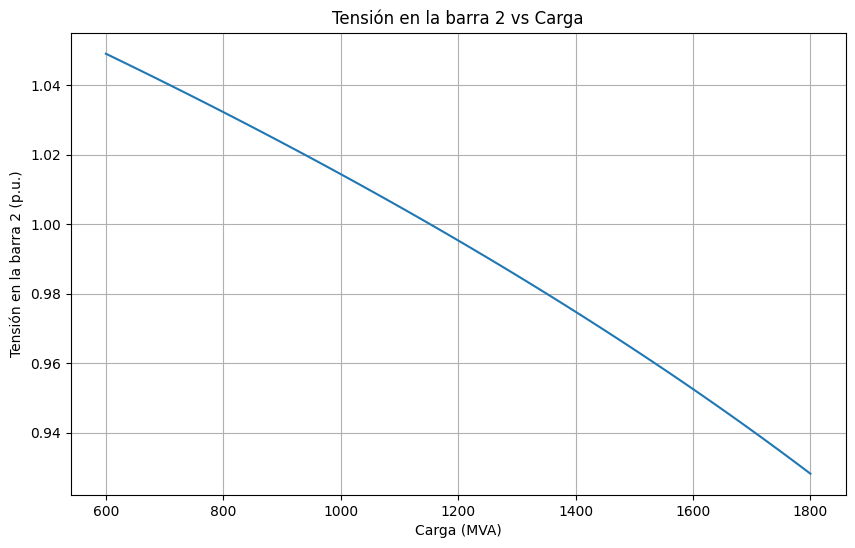

In [13]:
import pandapower as pp
import numpy as np
import matplotlib.pyplot as plt

# Crear un nuevo sistema de energía vacío
net = pp.create_empty_network()

# Agregar la fuente a la barra 1
bus1 = pp.create_bus(net, vn_kv=500)
pp.create_ext_grid(net, bus=bus1)

# Agregar la segunda barra
bus2 = pp.create_bus(net, vn_kv=500)

# Agregar las líneas de transmisión
line_data = {"r_ohm_per_km": 0.02, "x_ohm_per_km": 0.115, "c_nf_per_km": 19.1, "max_i_ka": 1., "type": "line"}
pp.create_std_type(net, line_data, "linea")
linea1 = pp.create_line(net, from_bus=bus1, to_bus=bus2, length_km=500., std_type="linea", name="linea1", parallel=2)

# Potencia de la carga
S = 1200  # Potencia aparente en MVA
fp = 0.9  # Factor de potencia

# Potencia activa y reactiva
P = S * fp
Q = S * np.sin(np.arccos(fp))

# Agregar la carga a la segunda barra
pp.create_load(net, bus=bus2, p_mw=P, q_mvar=Q)

# Rango de cargas
load_range = np.linspace(0.5*S, 1.5*S, 100)

# Tensión en la segunda barra para cada carga
V2_mags = []
for S in load_range:
    P = S * fp
    Q = S * np.sin(np.arccos(fp))
    net.load.loc[0, 'p_mw'] = P
    net.load.loc[0, 'q_mvar'] = Q
    pp.runpp(net)
    V2_mags.append(net.res_bus.vm_pu[bus2])

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(load_range, V2_mags)
plt.xlabel('Carga (MVA)')
plt.ylabel('Tensión en la barra 2 (p.u.)')
plt.title('Tensión en la barra 2 vs Carga')
plt.grid(True)
plt.show()

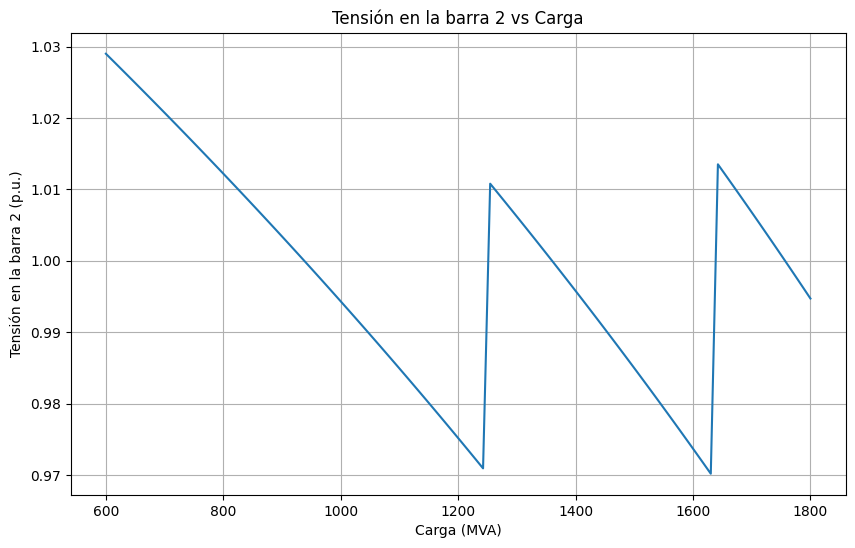

In [42]:
import pandapower as pp
import numpy as np
import matplotlib.pyplot as plt

# Crear un nuevo sistema de energía vacío
net = pp.create_empty_network()

# Agregar la fuente a la barra 1
bus1 = pp.create_bus(net, vn_kv=500)
pp.create_ext_grid(net, bus=bus1)

# Agregar la segunda barra
bus2 = pp.create_bus(net, vn_kv=500)

# Agregar las líneas de transmisión
line_data = {"r_ohm_per_km": 0.02, "x_ohm_per_km": 0.115, "c_nf_per_km": 19.1, "max_i_ka": 1., "type": "line"}
pp.create_std_type(net, line_data, "linea")
linea1 = pp.create_line(net, from_bus=bus1, to_bus=bus2, length_km=500., std_type="linea", name="linea1", parallel=2)

# Potencia de la carga
S = 1200  # Potencia aparente en MVA
fp = 0.9  # Factor de potencia

# Potencia activa y reactiva
P = S * fp
Q = S * np.sin(np.arccos(fp))

# Agregar la carga a la segunda barra
pp.create_load(net, bus=bus2, p_mw=P, q_mvar=Q)

# Rango de cargas
load_range = np.linspace(0.5*S, 1.5*S, 100)

# Tensión en la segunda barra para cada carga
V2_mags = []
for S in load_range:
    P = S * fp
    Q = S * np.sin(np.arccos(fp))
    net.load.loc[0, 'p_mw'] = P
    net.load.loc[0, 'q_mvar'] = Q
    pp.runpp(net)
    V2 = net.res_bus.vm_pu[bus2]
    
    # Compensación shunt con iteración
    max_iter = 20
    iter_count = 0
    while (V2 < 0.97 or V2 > 1.03) and iter_count < max_iter:
        if V2 < 0.97:
            # Agregar condensador shunt
            q_mvar = -450  # Compensación fija
            pp.create_shunt(net, bus2, q_mvar=q_mvar, p_mw=0, vn_kv=500, step=1)
        elif V2 > 1.03:
            # Agregar inductor shunt
            q_mvar = 150  # Compensación fija|
            pp.create_shunt(net, bus2, q_mvar=q_mvar, p_mw=0, vn_kv=500, step=1)
        
        pp.runpp(net)  # Recalcular flujo de potencia después de agregar el shunt
        V2 = net.res_bus.vm_pu[bus2]
        iter_count += 1
    
    V2_mags.append(V2)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(load_range, V2_mags)
plt.xlabel('Carga (MVA)')
plt.ylabel('Tensión en la barra 2 (p.u.)')
plt.title('Tensión en la barra 2 vs Carga')
plt.grid(True)
plt.show()